In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt

In [2]:
communities = gpd.read_file('boundaries.geojson')
communities.head()

,community,area,shape_area,perimeter,area_num_1,area_numbe,comarea_id,comarea,shape_len,geometry
0,DOUGLAS,0,46004621.1581,0,35,35,0,0,31027.0545098,(POLYGON ((-87.60914087617894 41.8446925026539...
1,OAKLAND,0,16913961.0408,0,36,36,0,0,19565.5061533,(POLYGON ((-87.59215283879394 41.8169293462668...
2,FULLER PARK,0,19916704.8692,0,37,37,0,0,25339.0897503,(POLYGON ((-87.62879823733725 41.8018930336891...
3,GRAND BOULEVARD,0,48492503.1554,0,38,38,0,0,28196.8371573,(POLYGON ((-87.6067081256125 41.81681377057218...
4,KENWOOD,0,29071741.9283,0,39,39,0,0,23325.1679062,(POLYGON ((-87.59215283879394 41.8169293462668...


In [3]:
points=communities.copy()
points['geometry']=points['geometry'].centroid
points.head()

,community,area,shape_area,perimeter,area_num_1,area_numbe,comarea_id,comarea,shape_len,geometry
0,DOUGLAS,0,46004621.1581,0,35,35,0,0,31027.0545098,POINT (-87.61867772050564 41.83511834262318)
1,OAKLAND,0,16913961.0408,0,36,36,0,0,19565.5061533,POINT (-87.60321641296161 41.8237503457304)
2,FULLER PARK,0,19916704.8692,0,37,37,0,0,25339.0897503,POINT (-87.63242456957649 41.8090854843581)
3,GRAND BOULEVARD,0,48492503.1554,0,38,38,0,0,28196.8371573,POINT (-87.6178596907689 41.81294935894828)
4,KENWOOD,0,29071741.9283,0,39,39,0,0,23325.1679062,POINT (-87.59618357877342 41.80891637016686)


In [4]:
points.crs = {'init' :'epsg:4326'}
gjson = points.to_json()

In [5]:
gjson

'{"type": "FeatureCollection", "features": [{"id": "0", "type": "Feature", "properties": {"community": "DOUGLAS", "area": "0", "shape_area": "46004621.1581", "perimeter": "0", "area_num_1": "35", "area_numbe": "35", "comarea_id": "0", "comarea": "0", "shape_len": "31027.0545098"}, "geometry": {"type": "Point", "coordinates": [-87.61867772050564, 41.835118342623176]}}, {"id": "1", "type": "Feature", "properties": {"community": "OAKLAND", "area": "0", "shape_area": "16913961.0408", "perimeter": "0", "area_num_1": "36", "area_numbe": "36", "comarea_id": "0", "comarea": "0", "shape_len": "19565.5061533"}, "geometry": {"type": "Point", "coordinates": [-87.60321641296161, 41.823750345730396]}}, {"id": "2", "type": "Feature", "properties": {"community": "FULLER PARK", "area": "0", "shape_area": "19916704.8692", "perimeter": "0", "area_num_1": "37", "area_numbe": "37", "comarea_id": "0", "comarea": "0", "shape_len": "25339.0897503"}, "geometry": {"type": "Point", "coordinates": [-87.6324245695

<Figure size 7200x7200 with 0 Axes>

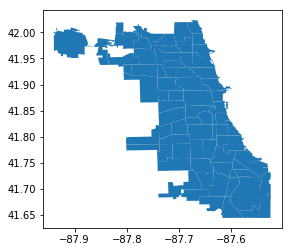

In [6]:
plt.figure(figsize=(100,100))
communities.plot()


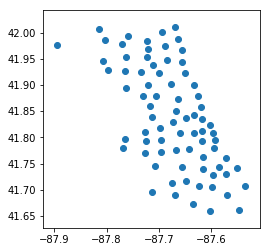

In [7]:
points.plot()

In [8]:
import folium

In [16]:
map = folium.Map(location=[41.8781,-87.6298], tiles='cartodbpositron',zoom_start=10)
map

In [29]:
locations = points[['community','geometry']]
locationlist = locations.values.tolist()
len(locationlist)
locationlist.head()

AttributeError: 'list' object has no attribute 'head'

In [18]:
for point in range(0, len(locationlist)):
    folium.Marker(locationlist[point], popup=points['community'][point]).add_to(map)
map

ValueError: Expected two (lat, lon) values for location, instead got: [<shapely.geometry.point.Point object at 0x00000145EAB75160>].

In [30]:
neighborhood_coord = points['community','geometry']
len(neighborhood_coord)

KeyError: ('community', 'geometry')

In [35]:
import json
[folium.Marker(location=[p.y, p.x]).add_to(map)
 for p in points['geometry']]

comm_geojson = json.load(open('boundaries.geojson'))

new_map=folium.Choropleth(
    geo_data=comm_geojson, 
    data = crime_sum,
    columns = ['Community Number', 'Crime'],
    key_on='feature.properties.area_numbe',
    fill_color='YlOrRd', 
    fill_opacity=0.5, 
    line_opacity=1,
    highlight=True,
    legend_name="Total Incidents"
    ).add_to(final_map)

map

In [ ]:
for point in range(0, len(locationlist)):
    folium.Marker(locationlist[point], popup=points['community'][point]).add_to(map)
map

In [ ]:
import geojsonio

In [ ]:
geojsonio.display(communities,force_gist=True)

In [ ]:
import folium
from IPython.display import HTML

In [ ]:
m = folium.Map(location=[41.8781,-87.6298], tiles='Stamen Toner',zoom_start=10)
m
# m.choropleth(geo_path="boundaries.geojson",
#                      fill_opacity=0.5, line_opacity=0.5
#                      ) 

# folium.GeoJson("boundaries.geojson").add_to(m)
# # folium.GeoJson(gjson).add_to(m)
# m.save('output1.html')
display(m)

In [ ]:
points.crs = {'init' :'epsg:4326'}
gjson = points.to_json()

In [ ]:
gjson

In [ ]:
m = folium.Map([41.8722, -87.6188], zoom_start=11)
points = folium.features.GeoJson(gjson)
m.add_children(points)
m.save("output.html")